<a href="https://colab.research.google.com/github/Ehizson/AI-ML-Paths/blob/main/House_price_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Price Prediction**

This project involves building a machine learning model to predict housing prices based on various factors such as the median income, housing median age, total rooms, and total bedrooms, etc. The project uses data from a housing dataset and implements more than one Regression model to make accurate 
predictions.

In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#loading dataset

data = pd.read_csv('/content/housing.csv')

**Data Inspection**

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
#fill empty rows with the median value

median = data['total_bedrooms'].median()
data['total_bedrooms'].fillna(median, inplace = True)

**Data Visualization**

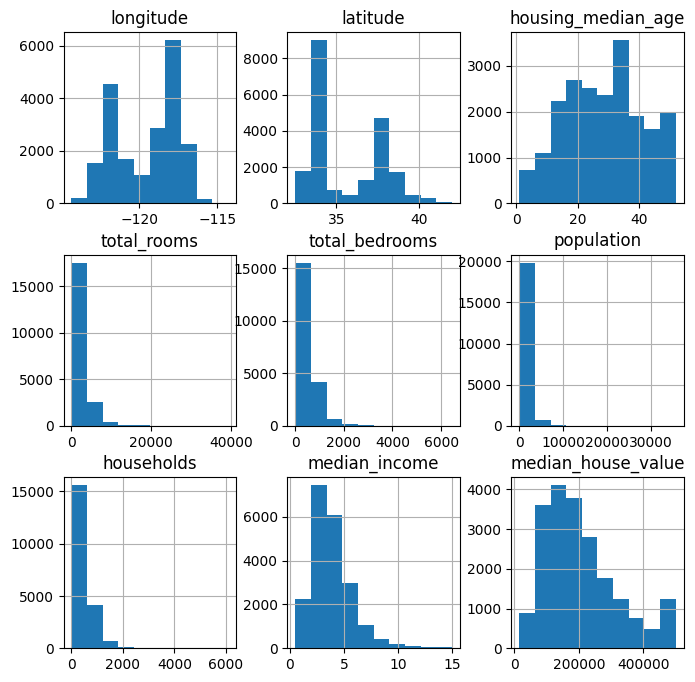

In [ ]:
data.hist(figsize = (8,8))
plt.show()

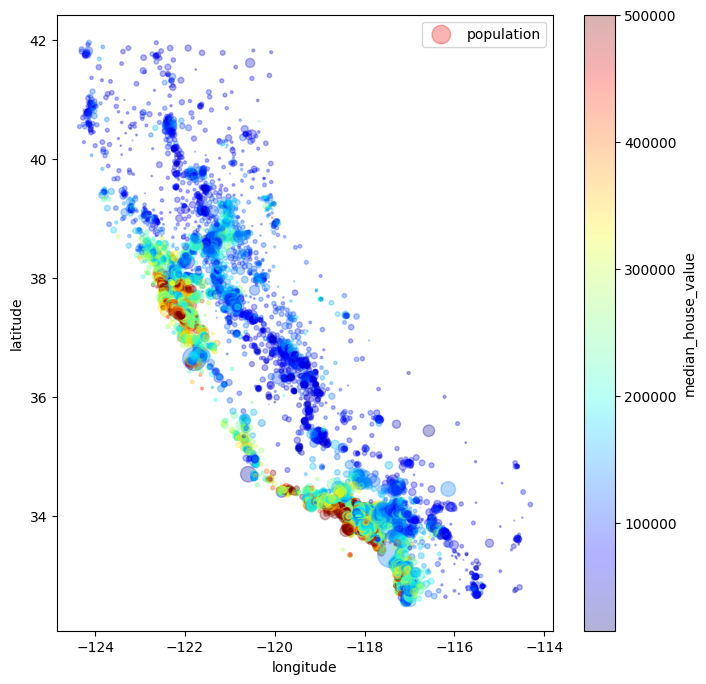

In [ ]:
#housing prices for each region

data.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.3,s = data['population']/100, c = 'median_house_value', label = 'population', figsize = (8,8), cmap = plt.get_cmap('jet'), colorbar = True)
plt.legend();

**ML model using Linear Regression**

In [ ]:
#define the input data(x) and output data(y)
y=data['median_house_value']

#drop some columns like price as it is in (y) already
x = data.drop(['median_house_value', 'households','population','ocean_proximity'], axis = 1)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#split the data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [ ]:
#check of the split data

print((x_train.shape[0] / x.shape[0]) * 100)
print((x_test.shape[0] / x.shape[0]) * 100)
print((y_train.shape[0] / y.shape[0]) * 100)
print((y_test.shape[0] / y.shape[0]) * 100)

80.0
20.0
80.0
20.0


In [ ]:
#train the data

model.fit(x_train, y_train)

LinearRegression()

In [ ]:
#test and score the model against the test data

model.score(x_test, y_test)

0.6070743103623417

The trained model is tested and scored against the testing data using the model.score() function, which gives an accuracy score of 0.60.

**Conclusion**

The project demonstrates how to use Linear Regression to predict housing prices based on various factors. However, the accuracy score of the model is not very high, and the project can be further improved by using more advanced machine learning techniques and tuning the hyperparameters of the model.

**ML model using DecisionTreeRegressor**

In [16]:
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor(random_state=1)

In [17]:
#Using a DecisionTreeRegressor for model

model2.fit(x_train,y_train)

DecisionTreeRegressor(random_state=1)

In [18]:
#test and score the model against the test data

model2.score(x_test, y_test)

0.6650373886826029

The accuracy score of model2 is 0.66

**Conclusion**

The accuracy score of model2 is higher than that of model1

**ML model using RandomForestRegressor**

In [19]:
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [20]:
#using a RandomForestRegressor for model

model3 = RandomForestRegressor(random_state=1)
model3.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

In [21]:
#test and score the model against the test data

model3.score(x_test, y_test)

0.8137115527972558

The accuracy score of model2 is 0.81

**Conclusion**

The accuracy score of model3 is higher than that of both model1 & model2